In [1]:
# set up imports
import pandas as pd, numpy as np, seaborn as sns
from tabulate import tabulate
import statsmodels
import arch
import matplotlib
matplotlib.use('qt5agg')

# configure plot style
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams["figure.figsize"] = (7,2.75)
plt.rcParams['figure.constrained_layout.use'] = False
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['lines.linewidth'] = 0.8
save_plot_to =  r'C:\\Users\joche\OneDrive\03 TUM - TUM-BWL\Semester 8\01 Bachelorarbeit\04 Results\Plots/'

In [2]:
# load data from excel file
mydateparser = lambda x: pd.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S')
btc = pd.read_excel('Data/BTC_closing.xlsx',squeeze=True, parse_dates=[0], index_col=0, date_parser=mydateparser)

# crop data: 2015-08-07 to 2020-06-26
start_date = '2015-08-07'
end_date = '2020-06-26'
btc = btc[start_date : end_date]

C:\Users\joche\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'btc_log')

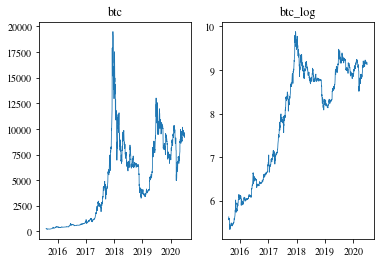

In [3]:
# fig1: btc neben btc_log
btc_log = np.log(btc)
fig_1, axes = plt.subplots(1,2, sharex=True)
axes[0].plot(btc)
axes[0].set_title('btc')
axes[1].plot(btc_log)
axes[1].set_title('btc_log')

In [4]:
# ADF- and PP- mit btc_log
from arch.unitroot import ADF, PhillipsPerron
adf = ADF(btc_log)
pp = PhillipsPerron(btc_log)
print(adf.summary().as_text(),'\n\n\n', pp.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -1.500
P-value                         0.533
Lags                                0
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary. 


      Phillips-Perron Test (Z-tau)    
Test Statistic                 -1.492
P-value                         0.537
Lags                               25
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [13]:
# Differenzenbildung: btc_log -> btc_log_diff1
# ADF- and PP- mit btc_log_diff1
from arch.unitroot import ADF, PhillipsPerron
btc_log_diff1 = btc_log.diff().dropna()
adf = ADF(btc_log_diff1)
pp = PhillipsPerron(btc_log_diff1)
print(adf.summary().as_latex(),'\n\n\n', pp.summary().as_latex())

\begin{center}
\begin{tabular}{lr}
\toprule
Test Statistic     &            -43.373  \\
P-value            &              0.000  \\
\bottomrule
\end{tabular}
%\caption{Augmented Dickey-Fuller Results}
\end{center}

Trend: Constant \newline
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%) \newline
 Null Hypothesis: The process contains a unit root. \newline
 Alternative Hypothesis: The process is weakly stationary. 


 \begin{center}
\begin{tabular}{lr}
\toprule
Test Statistic     &            -43.453  \\
P-value            &              0.000  \\
\bottomrule
\end{tabular}
%\caption{Phillips-Perron Test (Z-tau)}
\end{center}

Trend: Constant \newline
 Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%) \newline
 Null Hypothesis: The process contains a unit root. \newline
 Alternative Hypothesis: The process is weakly stationary.


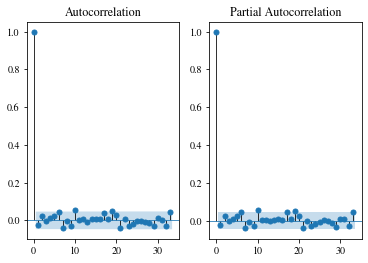

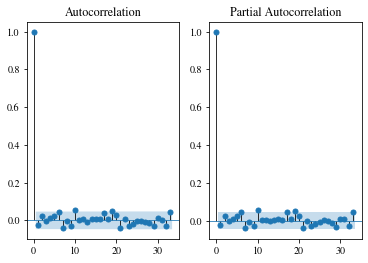

In [6]:
# ACF und PACF plot für btc_log_diff1
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig_2, axes = plt.subplots(1,2)
plot_acf(btc_log_diff1, ax=axes[0])
plot_pacf(btc_log_diff1, ax=axes[1])


In [11]:
# ARIMA(p,1,q) fit: Teste verschiedene Modelle anhand des ACF/PACF
def writeARIMA_LaTeX_logs_to_file(p_values, q_values):
    import sys
    old_stdout = sys.stdout
    sys.stdout = open(save_plot_to+'ARIMA_logs_LaTeX.txt', "w")
    
    min_aic, opt_order = float('inf'), None
    for p in p_values:
        for q in q_values:
            current_order = (p, 1, q)
            try:
                model = ARIMA(btc_log, order=current_order)
                model_fit = model.fit(disp=False)
                if model_fit.aic < min_aic:
                    min_aic, opt_order = model_fit.aic, current_order
                print(model_fit.summary().as_latex(), '\n\n\n')
            except:
                continue
    opt_model = ARIMA(btc_log, order=opt_order)
    opt_fitted = opt_model.fit(disp=False)
    
    sys.stdout.close()
    sys.stdout = old_stdout
    print('Best fit: ARIMA{}\nAIC:   {}\nBIC:   {}\nHQIC:  {}'.format(opt_order, opt_fitted.aic, opt_fitted.bic, opt_fitted.hqic))

p_values = [0, 5, 6]
q_values = [0, 5, 10]
#writeARIMA_LaTeX_logs_to_file(p_values, q_values)

C:\Users\joche\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\joche\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\joche\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\joche\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\joche\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information w

Best fit: ARIMA(5, 1, 5)
AIC:   -6401.739547570934
BIC:   -6335.893463240369
HQIC:  -6377.422954392846
